In [6]:
%load_ext autoreload
%autoreload 2
import os
import glob
import h5py
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import torch
import torch.nn as nn
from m3util.viz.style import set_style
from m3util.viz.printing import printer
from m3util.viz.layout import layout_fig
from dl_utils.training.build_model import resnet50_
from dl_utils.analysis.confusion_matrix import confusion_matrix, plot_cm, show_multiple_cm
from dl_utils.analysis.attention_map import AttentionMapVisualizer
from dl_utils.analysis.case_analysis import prediction_vs_actual, most_confused_pairs, generate_prediction_example
from dl_utils.packed_functions import generate_attention_maps

printing = printer(basepath = '../../figures/ConfusionMatrix/', fileformats=['png', 'svg'], dpi=600)
set_style("printing")

symmetry_classes = ['p1', 'p2', 'pm', 'pg', 'cm', 'pmm', 'pmg', 'pgg', 'cmm', 'p4', 'p4m', 'p4g', 'p3', 'p3m1', 'p31m', 'p6', 'p6m']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
printing set for seaborn


## Compare well-trained models with 10m dataset

Compare different model structures

../../figures/ConfusionMatrix/cm-compare_models.png
../../figures/ConfusionMatrix/cm-compare_models.svg


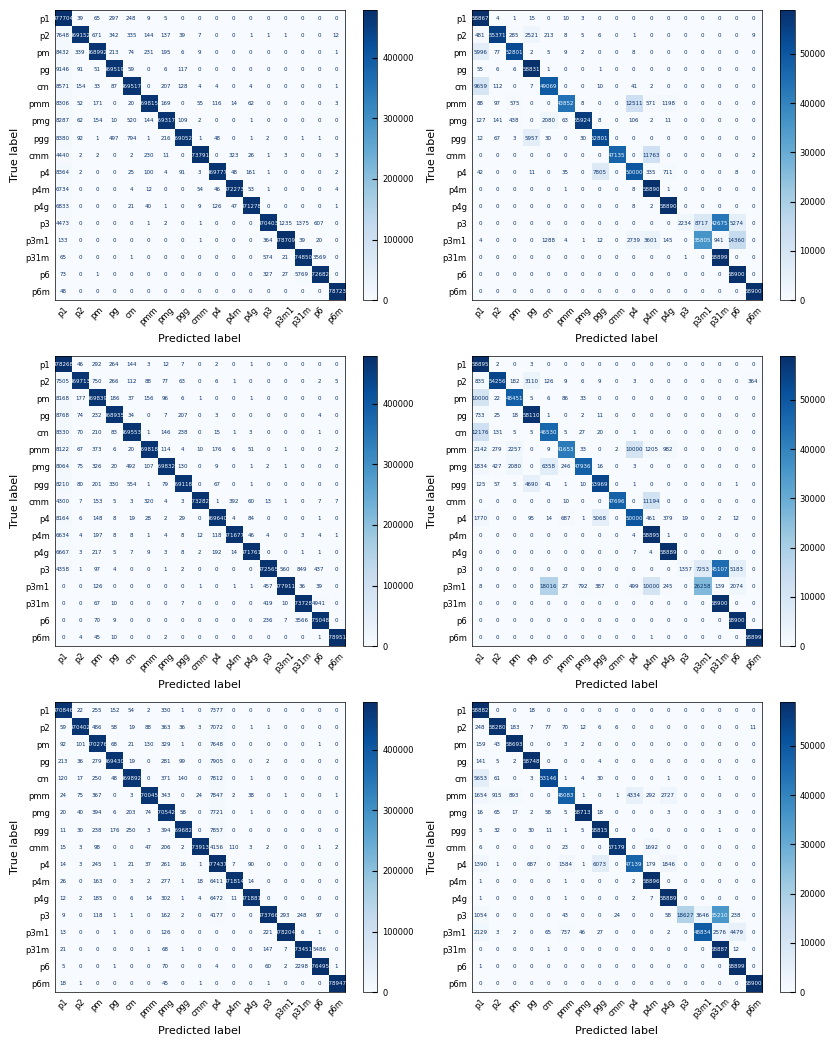

In [8]:
cm_files = [
            '../../results/ResNet50/09112024-resnet50-dataset_v5_size-10m-imagenet_train_cm.npy',
            '../../results/ResNet50/09112024-resnet50-dataset_v5_size-10m-atom_cross_validation_cm.npy',
            '../../results/FPN/09282024-FPN-dataset_v5_size-10m-imagenet_train_cm.npy',
            '../../results/FPN/09282024-FPN-dataset_v5_size-10m-atom_cross_validation_cm.npy',
            '../../results/XCiT/09302024-XCiT-dataset_v5_size-10m-imagenet_train_cm.npy',
            '../../results/XCiT/09302024-XCiT-dataset_v5_size-10m-atom_cross_validation_cm.npy',
            ]
fig, axes = layout_fig(len(cm_files), 2, figsize=(8.5, 10.5), layout='tight')
for i, cm_file in enumerate(cm_files):
    cm = np.load(cm_file)
    plot_cm(cm, symmetry_classes, ax=axes[i], font_size=4)
    
printing.savefig(fig, 'cm-compare_models')
plt.show()

### Choose p3 (true) -> p3 (prediction) pair as example to illustrate the different performance between model structures:
Transformer tends to perform better than regular CNN(ResNet50) or modified CNN(feature pyramid) when it comes to 3-fold rotation related symmetry classes, such as p3, p3m1, p31m and p6.

True: p3 | Predicted: p3
p3: 99.99%, p1: 0.01%, p31m: 0.00%, p3m1: 0.00%, p6: 0.00%


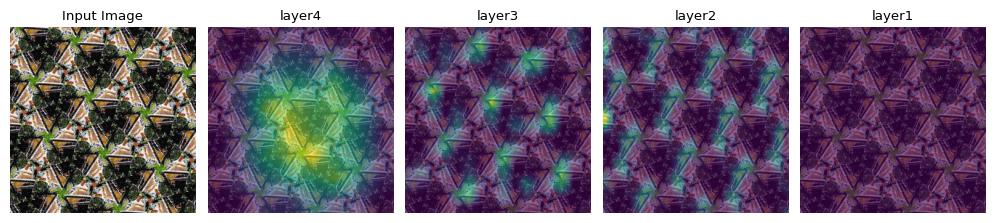

In [7]:
ds_path = f'../../datasets/imagenet_v5_rot_10m_fix_vector.h5'
group = 'imagenet'
device = torch.device('cpu')
visualizer = AttentionMapVisualizer(device=device)
model_type = 'ResNet50'
layers = ['layer4', 'layer3', 'layer2', 'layer1']
task_name = ''
model_path = '../../models/ResNet50/09112024-resnet50-dataset_v5_size-10m/model_epoch_20.pth'
input_image_np, overlay_attention_map_list, overlay_attention_map_list = generate_attention_maps(ds_path, group, ('p3', 'p3'), layers, task_name, model_type, model_path, device, filename=None, viz=True)

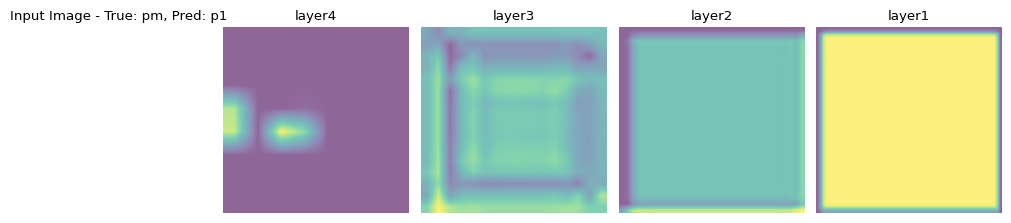

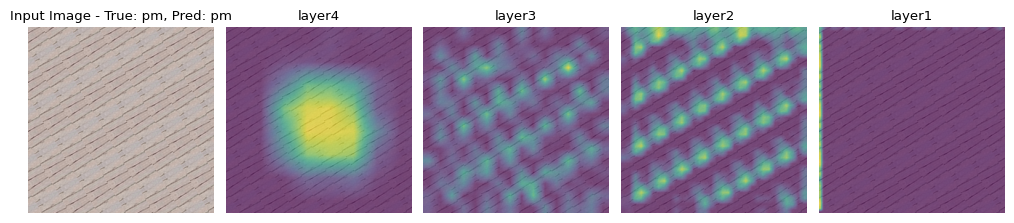

In [ ]:
ds_path = f'../../datasets/imagenet_v5_rot_10m_fix_vector.h5'
group = 'imagenet'
device = torch.device('cpu')
visualizer = AttentionMapVisualizer(device=device)
model_type = 'XCiT'
layers = [11, 7, 4, 0]
task_name = ''
model_path = '../../models/ResNet50/09112024-resnet50-dataset_v5_size-10m/model_epoch_20.pth'
input_image_np, overlay_attention_map_list, overlay_attention_map_list = generate_attention_maps(ds_path, group, ('p3', 'p3'), layers, task_name, model_type, model_path, device, filename=None, viz=True)

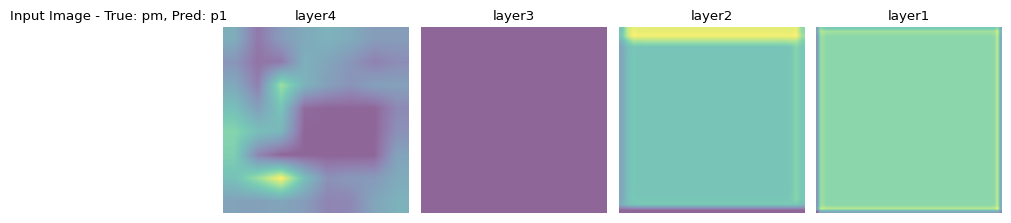

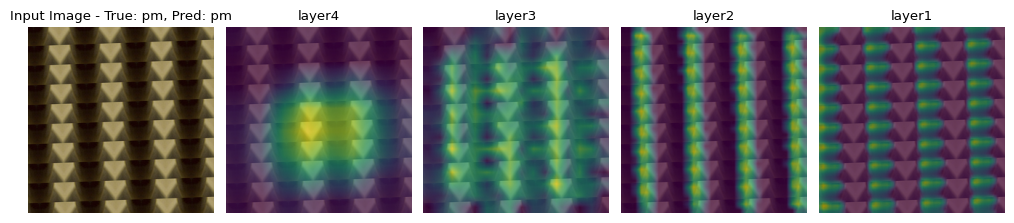

In [ ]:
confusion_pair = ('pm', 'p1')
model_path = '../../models/ResNet50/09052024-resnet50-dataset_v5_size-2m/model_epoch_40.pth'
input_image_np, overlay_attention_map_list, overlay_attention_map_list = generate_attention_maps(ds_path, group, confusion_pair, layers, task_name, model_type, model_path, device, filename=None, viz=True)

confusion_pair = ('pm', 'pm')
input_image_np, overlay_attention_map_list, overlay_attention_map_list = generate_attention_maps(ds_path, group, confusion_pair, layers, task_name, model_type, model_path, device, filename=None, viz=True)